In [1]:
pip install mahotas

     |████████████████████████████████| 5.7MB 8.2MB/s 


In [2]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import mahotas 
import cv2
import os
import sys

In [81]:
dataset = pd.read_csv("apple_reduced.csv")

In [82]:
dataset.head(5)

,Unnamed: 0,isHealthy,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,Apple___Black_rot,111.653564,118.266891,103.696976,53.175653,37.329550,51.742591,642.442633,0.828300,0.060938,13.358900
1,0,Apple___Black_rot,121.940063,122.818069,127.231995,50.305909,47.988402,52.886407,546.947095,0.884752,0.149001,12.906667
2,0,Apple___Black_rot,112.254074,123.337952,108.476837,60.731182,45.710183,72.154916,921.051755,0.827812,0.071665,13.840327
3,0,Apple___Black_rot,117.993652,120.947250,120.620193,54.241066,42.104179,62.929841,741.525799,0.834933,0.115369,13.116848
4,0,Apple___Black_rot,114.553238,125.674103,102.157394,50.405860,41.137000,58.815783,603.232223,0.829814,0.104557,13.271357


In [83]:
dataset = shuffle(dataset)

In [ ]:
#import seaborn as sns
#sns.pairplot(dataset,hue='isHealthy',palette='Dark2')

In [84]:
#Healthy
health_list = []
for d in dataset['isHealthy']:
  if "Apple___healthy" in d:
    health_list.append(0)
  else:
    health_list.append(1)

In [85]:
#np.set_printoptions(threshold=sys.maxsize)
y = np.array(health_list)
print(y)

[0 0 1 ... 1 0 1]


In [86]:
X = dataset.iloc[:,2:]

In [87]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1253,98.268692,97.162643,87.621689,53.542651,44.999872,47.217522,1005.867826,0.775891,0.070709,13.989260
1491,141.188065,144.784500,136.037262,57.595099,51.472066,63.993981,773.428450,0.869039,0.111387,13.647965
322,122.474533,126.801819,109.467117,49.581288,34.374173,49.665314,657.940391,0.792895,0.060567,13.500670
2874,80.801926,104.335846,104.189957,21.814724,17.536186,36.225281,84.218762,0.880262,0.292261,10.706960
1587,87.671387,96.234085,94.310638,39.885200,30.411748,36.590997,147.716942,0.934764,0.152590,12.166375


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

#X= shuffle(X)

# test is now 20% of the initial data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

# train is now 70% of the entire data set
# validation is now 10% of the initial data set
x_train,x_val,y_train ,y_val = train_test_split(x_train, y_train, test_size=validation_ratio/(train_ratio + validation_ratio)) 
#print(x_train, x_val, x_test)
print(len(x_train), len(x_val), len(x_test))



2201 315 630


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc_X = StandardScaler()
X_train = sc_X.fit(x_train)
X_train = sc_X.transform(x_train)
X_val = sc_X.transform(x_val)
X_test = sc_X.transform(x_test)

In [92]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [93]:
# training model with different hyperparameters

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_val)


svm_model2 = svm.SVC(C=1, kernel='linear')
svm_model2.fit(X_train, y_train)
predictions2 = svm_model2.predict(X_val)


svm_model3 = svm.SVC(C=10, gamma=0.5, kernel='rbf')
svm_model3.fit(X_train, y_train)
predictions3 = svm_model3.predict(X_val)

print("Val accuracy, no hyperparameters -->" , metrics.accuracy_score(y_val, predictions))
print("Val accuracy, C=1, kernel=linear -->" , metrics.accuracy_score(y_val, predictions2))
print("Val accuracy C=10, gamma=0.5, kernel=rbf -->" , metrics.accuracy_score(y_val, predictions3))

Val accuracy, no hyperparameters --> 0.9619047619047619
Val accuracy, C=1, kernel=linear --> 0.8984126984126984
Val accuracy C=10, gamma=0.5, kernel=rbf --> 0.9619047619047619


In [94]:
#Tuning hyperparameters using GridSearchCV

param_grid = [{'C': [0.1,1, 10, 100], 'gamma': [1,0.5,0.2,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']},
              {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]

In [95]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2, cv=None)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.5, 0.2, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [96]:
print("Best estimators " , grid.best_estimator_)
print("Best parameters ", grid.best_params_)

Best estimators  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [97]:

grid_predictions = grid.predict(X_val)

In [98]:
print("Val accuracy " , metrics.accuracy_score(y_val, grid_predictions))

Val accuracy  0.9714285714285714


In [99]:
grid_predictions = grid.predict(X_test)

In [100]:
print("Accuracy" , metrics.accuracy_score(y_test, grid_predictions))

Accuracy 0.9555555555555556


TestReduced/image (619).JPG [1] [0]
----------
TestReduced/healthy (4).JPG [0] [0]
----------
TestReduced/image (273).JPG [1] [1]
----------
TestReduced/healthy (5).JPG [0] [0]
----------
TestReduced/image (272).JPG [1] [1]
----------
TestReduced/image (630).JPG [1] [1]
----------
TestReduced/image (620).JPG [1] [1]
----------
TestReduced/image (271).JPG [1] [1]
----------
TestReduced/image (275).JPG [1] [1]
----------
TestReduced/healthy (1).JPG [0] [0]
----------
TestReduced/image (274).JPG [1] [1]
----------
TestReduced/image (627).JPG [1] [1]
----------
TestReduced/image (618).JPG [1] [1]
----------
TestReduced/image (628).JPG [1] [1]
----------
TestReduced/image (621).JPG [1] [1]
----------
TestReduced/image (626).JPG [1] [1]
----------
TestReduced/image (616).JPG [1] [0]
----------
TestReduced/healthy (3).JPG [0] [0]
----------
TestReduced/image (629).JPG [1] [1]
----------
TestReduced/image (617).JPG [1] [1]
----------


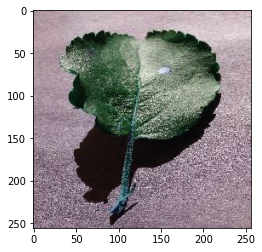

In [104]:
def get_leaf_features(photo):
  fixed_size = tuple((256, 256))
  names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
              'contrast','correlation','inverse_difference_moments','entropy']
  df = pd.DataFrame([], columns=names)

  img = cv2.imread(photo)
  img = cv2.resize(img, fixed_size)

  #Preprocessing
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gs, (25,25),0)
  ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones((50,50),np.uint8)
  closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

  final_img = img

  #get features
  #Color features
  red_channel = final_img[:,:,0]
  green_channel = final_img[:,:,1]
  blue_channel = final_img[:,:,2]
  blue_channel[blue_channel == 255] = 0
  green_channel[green_channel == 255] = 0
  red_channel[red_channel == 255] = 0
  
  red_mean = np.mean(red_channel)
  green_mean = np.mean(green_channel)
  blue_mean = np.mean(blue_channel)
  
  red_std = np.std(red_channel)
  green_std = np.std(green_channel)
  blue_std = np.std(blue_channel)
  
  #Texture features
  textures = mahotas.features.haralick(gs)
  ht_mean = textures.mean(axis=0)
  contrast = ht_mean[1]
  correlation = ht_mean[2]
  inverse_diff_moments = ht_mean[4]
  entropy = ht_mean[8]
  #write in csv

  vector = [red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
            contrast,correlation,inverse_diff_moments,entropy ]
  df_temp = pd.DataFrame([vector],columns=names)
  df = df.append(df_temp)
  return df

path = "TestReduced"
files = os.listdir(path)

for file in files:
    photo = os.path.join(path,file)
    #print(photo)
    leaf_features = get_leaf_features(photo)
    X= sc_X.transform(leaf_features)
    if "healthy" not in photo: 
      y = [1]
    else:
      y = [0];

    y_pred = grid.predict(X)
    print(photo, y, y_pred)

    if(y != y_pred):
      img = cv2.imread(photo)
      plt.imshow(img)
  
    #print("Accuracy" , metrics.accuracy_score(y, y_pred ), y , y_pred)
    print("----------")
